In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sqlite3 import dbapi2 as sqlite

In [15]:
from sqlite3 import dbapi2 as sqlite

In [46]:
import pysqlite3

ModuleNotFoundError: No module named 'pysqlite3'

In [45]:
from pysqlite3 import dbapi2 as sqlite3

ModuleNotFoundError: No module named 'pysqlite3'

In [16]:
from sqlite3 import dbapi2 as sqlite3

In [17]:
import sqlite3

In [18]:
import sqlite3

In [19]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Sagar-modelling/ML_Live_Class/main/data/hearing_test.csv')

In [20]:
df.to_csv('hearing_test.csv')

In [21]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [22]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [23]:
df.shape

(5000, 3)

In [24]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

In [25]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [26]:
df.isnull()

,age,physical_score,test_result
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
4995,False,False,False
4996,False,False,False
4997,False,False,False
4998,False,False,False


In [27]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

Some EDA is Used

<Figure size 432x288 with 0 Axes>

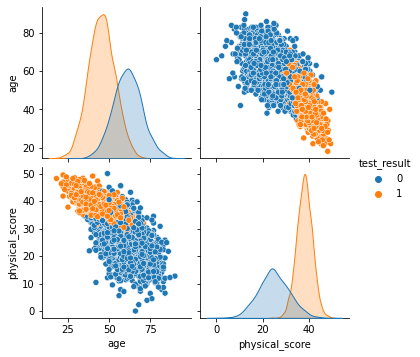

In [28]:
plt.figure()
sns.pairplot(data=df, hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

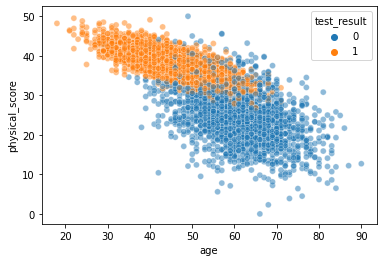

In [29]:
sns.scatterplot(x='age', y= 'physical_score', data =df, hue = 'test_result', alpha = 0.5)

<AxesSubplot:xlabel='test_result', ylabel='count'>

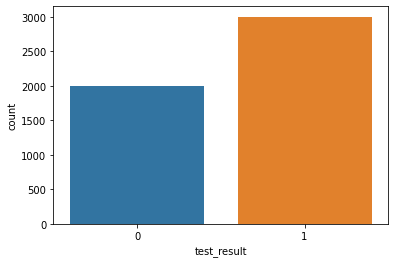

In [30]:
sns.countplot(data=df, x= 'test_result' )

Search for Outliers

<AxesSubplot:xlabel='test_result', ylabel='age'>

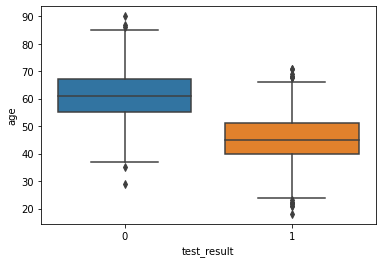

In [31]:
sns.boxplot(data=df, x='test_result' , y='age')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

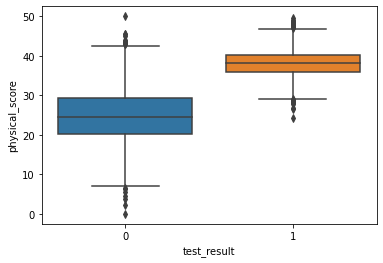

In [32]:
sns.boxplot(data=df, x='test_result' , y='physical_score')

<AxesSubplot:>

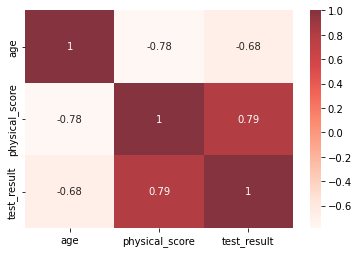

In [33]:
sns.heatmap(data=df.corr(), annot=True, cmap='Reds', alpha=0.8)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

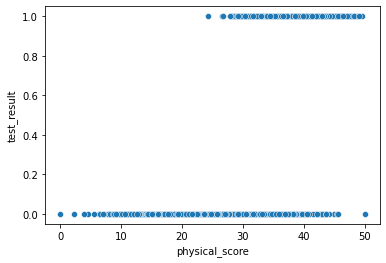

In [34]:
sns.scatterplot(x ='physical_score', y = 'test_result', data =df) #we never prefer scatterplots for predicting classes 

<AxesSubplot:xlabel='age', ylabel='physical_score'>

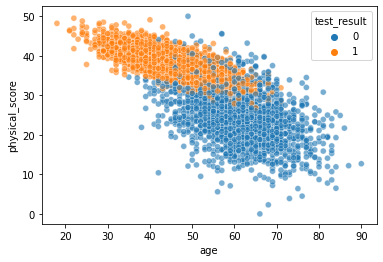

In [35]:
sns.scatterplot(x='age', y= 'physical_score', data =df, hue = 'test_result', alpha = 0.6)

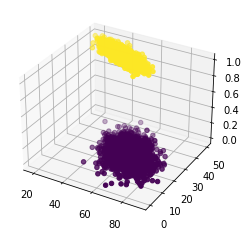

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c= df['test_result'])

# Train the Model

In [37]:

# Separating features from the data
X = df.drop('test_result', axis=1)
y = df['test_result']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [ ]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_pred[1]

1

Comparing the Real Values with Predicted Values

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
1718,1,1
2511,1,1
345,0,0
2521,1,1
54,0,0
...,...,...
4770,1,1
188,1,1
3335,0,0
4583,0,0


In [ ]:
# This value give prabality related to class 1 and 0
#y_pred = log_model.predict_proba(scaled_X_test)
# y_pred

array([[3.09267151e-02, 9.69073285e-01],
       [3.46183276e-02, 9.65381672e-01],
       [9.89850652e-01, 1.01493479e-02],
       [2.63867805e-03, 9.97361322e-01],
       [9.76798467e-01, 2.32015329e-02],
       [9.90296858e-01, 9.70314158e-03],
       [9.17503241e-02, 9.08249676e-01],
       [2.23885958e-02, 9.77611404e-01],
       [9.97136737e-01, 2.86326280e-03],
       [4.21538922e-02, 9.57846108e-01],
       [1.02178637e-01, 8.97821363e-01],
       [1.32310276e-02, 9.86768972e-01],
       [9.53021603e-03, 9.90469784e-01],
       [9.41001469e-01, 5.89985310e-02],
       [1.73909902e-04, 9.99826090e-01],
       [8.23877636e-02, 9.17612236e-01],
       [9.89664721e-01, 1.03352792e-02],
       [3.85833550e-03, 9.96141665e-01],
       [7.99114453e-04, 9.99200886e-01],
       [9.96617310e-01, 3.38268988e-03],
       [8.93305492e-01, 1.06694508e-01],
       [1.57519985e-01, 8.42480015e-01],
       [5.84191779e-01, 4.15808221e-01],
       [4.37511514e-02, 9.56248849e-01],
       [4.394643

Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.924

In [ ]:
confusion_matrix(y_test, y_pred)

array([[173,  20],
       [ 18, 289]], dtype=int64)

C:\Users\Jalpa\anaconda3\envs\mlclass\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


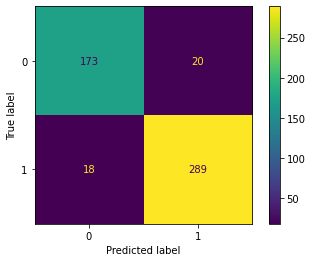

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred, y_test)
recall_score(y_pred, y_test)

0.9352750809061489

In [ ]:
precision_score(y_pred, y_test)

0.9413680781758957

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

C:\Users\Jalpa\anaconda3\envs\mlclass\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


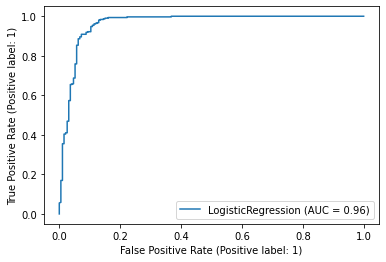

In [ ]:
plot_roc_curve(log_model, scaled_X_test, y_test)

C:\Users\Jalpa\anaconda3\envs\mlclass\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


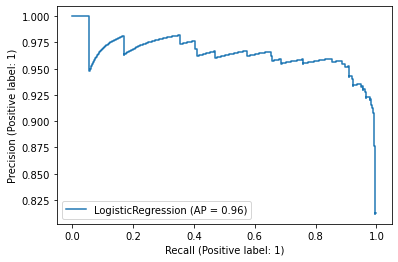

In [ ]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)